# Modely

## Příprava dat

In [1]:
pip install scikit-plot

Note: you may need to restart the kernel to use updated packages.


In [2]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.filterwarnings(action = 'ignore' , category=DeprecationWarning)

In [3]:
#naloadování balíčků
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"
from xgboost import XGBClassifier
from sklearn.model_selection import RandomizedSearchCV
from scipy import stats
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import BaggingClassifier
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
import scikitplot as skplt
#pandas, numpy, random.randint
import pandas as pd
import numpy as np
from random import randint
#sklearn preprocessing functions
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
#sklearn models
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn import tree
from sklearn.naive_bayes import GaussianNB
#sklearn model evaluation
from sklearn.model_selection import cross_val_score
from sklearn.metrics import roc_curve
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report 
from sklearn.linear_model import LogisticRegressionCV
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import plot_confusion_matrix
from sklearn import metrics
#matplotlib and seaborn for visualization
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
#sampling
import imblearn
from imblearn.over_sampling import RandomOverSampler
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import NearMiss


In [4]:
np.random.seed(12345)

In [5]:
df= pd.read_csv(filepath_or_buffer="ModelBanking01.csv")

In [6]:
df

,Unnamed: 0,Customer_ID,Gender,Age_Groups,Ten_Groups,Saving_Amount,Current_Amount,Time_Deposits_Amount,Funds_Amount,Stocks_Amount,...,Home_Loan_Amount,Consumer_Loan_Amount,Loans,Branch_Transactions,ATM_Transactions,Phone_Transactions,Internet_Transactions,Standing_Orders,Transactions,New_Credit_Card_Flag
0,0,1,M,Střední,Nový,0.000000,0.000000,0.000000,0.000000,0.0,...,20044.611429,0.000000,20044.611429,0,0,0,0,0,0,0
1,1,2,F,Starší střední,Nový,0.000000,0.000000,0.000000,0.000000,0.0,...,0.000000,2430.224286,2430.224286,4,3,0,0,0,7,0
2,2,3,M,Střední,Nový,18.825714,0.000000,0.000000,0.000000,0.0,...,0.000000,0.000000,0.000000,0,0,0,0,0,0,0
3,3,4,M,Starší střední,Nový,0.000000,603.791429,0.000000,0.000000,0.0,...,0.000000,0.000000,0.000000,7,7,0,0,12,26,0
4,4,5,F,Starší střední,Nový,0.000000,0.000000,0.000000,0.000000,0.0,...,0.000000,2.720000,2.720000,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9995,9996,F,Starší střední,Nový,0.000000,0.000000,0.000000,0.000000,0.0,...,0.000000,6634.375714,6634.375714,5,0,0,0,0,5,0
9996,9996,9997,M,Mladší střední,Nový,8036.300000,0.000000,0.000000,0.000000,0.0,...,0.000000,0.000000,0.000000,5,0,0,0,0,5,0
9997,9997,9998,F,Mladší střední,Nový,6268.200000,0.000000,26299.425714,6100.382857,0.0,...,0.000000,0.000000,0.000000,5,0,6,2,0,13,1
9998,9998,9999,F,Mladý,Nový,0.000000,0.000000,0.000000,0.000000,0.0,...,0.000000,2718.712857,2718.712857,1,0,0,0,0,1,0


# Chi2

In [7]:
X = df.loc[:, df.columns != "New_Credit_Card_Flag"]
y = df["New_Credit_Card_Flag"]

In [8]:
import scipy

In [9]:
# Define alpha
alpha = 0.05

for col in X.columns.values:

    A, B = df[col], df["New_Credit_Card_Flag"]

    dfObserved = pd.crosstab(A, B) 
    chi2, p, dof, expected = scipy.stats.chi2_contingency(dfObserved.values)

    if p < alpha:
        # Reject null hypothesis
        print("{} is important. (p = {})".format(col, p))
    else:
        # Accept null hypothesis
        print("{} is NOT important. (p = {})".format(col, p))

Unnamed: 0 is NOT important. (p = 0.4952983945386835)
Customer_ID is NOT important. (p = 0.4952983945386835)
Gender is important. (p = 0.005351286675730331)
Age_Groups is important. (p = 8.33597169917116e-16)
Ten_Groups is important. (p = 1.3390957192129632e-16)
Saving_Amount is NOT important. (p = 1.0)
Current_Amount is important. (p = 0.04684301095452589)
Time_Deposits_Amount is NOT important. (p = 0.9999999999999999)
Funds_Amount is NOT important. (p = 0.9999999999995884)
Stocks_Amount is NOT important. (p = 0.9999999999935244)
Money_Amount is NOT important. (p = 1.0)
Bank_Assurance_Amount is important. (p = 7.1321110628979316e-06)
Life_Assurance_Amount is important. (p = 4.4100883361384203e-17)
Business_Loan_Amount is important. (p = 9.099548169937947e-11)
Home_Loan_Amount is important. (p = 0.00046858236420413505)
Consumer_Loan_Amount is important. (p = 2.813302362649272e-150)
Loans is important. (p = 1.920422762253368e-122)
Branch_Transactions is important. (p = 2.074063649466526

In [10]:
df = df.drop (['Unnamed: 0','Customer_ID','Saving_Amount','Time_Deposits_Amount','Funds_Amount','Stocks_Amount'], axis = 1) 

In [11]:
df

,Gender,Age_Groups,Ten_Groups,Current_Amount,Money_Amount,Bank_Assurance_Amount,Life_Assurance_Amount,Business_Loan_Amount,Home_Loan_Amount,Consumer_Loan_Amount,Loans,Branch_Transactions,ATM_Transactions,Phone_Transactions,Internet_Transactions,Standing_Orders,Transactions,New_Credit_Card_Flag
0,M,Střední,Nový,0.000000,0.000000,139.194286,0.000000,0.0,20044.611429,0.000000,20044.611429,0,0,0,0,0,0,0
1,F,Starší střední,Nový,0.000000,0.000000,0.000000,32.205714,0.0,0.000000,2430.224286,2430.224286,4,3,0,0,0,7,0
2,M,Střední,Nový,0.000000,18.825714,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0,0,0,0,0,0,0
3,M,Starší střední,Nový,603.791429,603.791429,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,7,7,0,0,12,26,0
4,F,Starší střední,Nový,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,2.720000,2.720000,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,F,Starší střední,Nový,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,6634.375714,6634.375714,5,0,0,0,0,5,0
9996,M,Mladší střední,Nový,0.000000,8036.300000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,5,0,0,0,0,5,0
9997,F,Mladší střední,Nový,0.000000,38668.008571,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,5,0,6,2,0,13,1
9998,F,Mladý,Nový,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,2718.712857,2718.712857,1,0,0,0,0,1,0


#### Label Encoder 

In [12]:
# přetypování sloupců na boolean
#df['Saving_Amount'] = [True if i > 0 else False for i in df['Saving_Amount']]
df['Current_Amount'] = [True if i > 0 else False for i in df['Current_Amount']]
#df['Time_Deposits_Amount'] = [True if i > 0 else False for i in df['Time_Deposits_Amount']]
#df['Funds_Amount'] = [True if i > 0 else False for i in df['Funds_Amount']]
#df['Stocks_Amount'] =[True if i > 0 else False for i in df['Stocks_Amount']]
df['Bank_Assurance_Amount'] = [True if i > 0 else False for i in df['Bank_Assurance_Amount']]
df['Life_Assurance_Amount'] = [True if i > 0 else False for i in df['Life_Assurance_Amount']]
df['Home_Loan_Amount'] = [True if i > 0 else False for i in df['Home_Loan_Amount']]
df['Business_Loan_Amount'] =[True if i > 0 else False for i in df['Business_Loan_Amount']]
df['Consumer_Loan_Amount'] =[True if i > 0 else False for i in df['Consumer_Loan_Amount']]
df['Branch_Transactions'] = [True if i > 0 else False for i in df['Branch_Transactions']]
df['ATM_Transactions'] = [True if i > 0 else False for i in df['ATM_Transactions']]
df['Phone_Transactions'] = [True if i > 0 else False for i in df['Phone_Transactions']]
df['Internet_Transactions'] = [True if i > 0 else False for i in df['Internet_Transactions']]
df['Standing_Orders'] = [True if i > 0 else False for i in df['Standing_Orders']]

In [13]:
gender = df.select_dtypes(include = "object").columns
boolean = df.select_dtypes(include = "bool").columns

In [14]:
# binární hodnoty pomocí Laber Encoder (popř. lze využít OHE)
le = preprocessing.LabelEncoder()
for i in gender:
    df[i] = le.fit_transform(df[i].astype(str))
for i in boolean:
    df[i] = le.fit_transform(df[i].astype(str))

In [15]:
le.fit(df['Gender'])
df['Gender']=le.transform(df['Gender'])
le.fit(df['Age_Groups'])
df['Age_Groups']=le.transform(df['Age_Groups'])
le.fit(df['Ten_Groups'])
df['Ten_Groups']=le.transform(df['Ten_Groups'])

LabelEncoder()

LabelEncoder()

LabelEncoder()

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 18 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Gender                 10000 non-null  int64  
 1   Age_Groups             10000 non-null  int64  
 2   Ten_Groups             10000 non-null  int64  
 3   Current_Amount         10000 non-null  int32  
 4   Money_Amount           10000 non-null  float64
 5   Bank_Assurance_Amount  10000 non-null  int32  
 6   Life_Assurance_Amount  10000 non-null  int32  
 7   Business_Loan_Amount   10000 non-null  int32  
 8   Home_Loan_Amount       10000 non-null  int32  
 9   Consumer_Loan_Amount   10000 non-null  int32  
 10  Loans                  10000 non-null  float64
 11  Branch_Transactions    10000 non-null  int32  
 12  ATM_Transactions       10000 non-null  int32  
 13  Phone_Transactions     10000 non-null  int32  
 14  Internet_Transactions  10000 non-null  int32  
 15  Sta

In [17]:
# dataset pro mod.to_csv('ModelBanking01.csv')
# dataset pro modelaci v Rapid Miner
df.to_csv('RapidMinerData1.csv')

## Train a test split

In [18]:
X = df.drop(['New_Credit_Card_Flag'], axis=1)
Y = df['New_Credit_Card_Flag']

In [19]:
# rozdělení na train a test sadu v poměru 75 % trénovacích a 25 % testovacích
train=df.sample(frac=0.75,random_state=42) #random state is a seed value
test=df.drop(train.index)

In [20]:
Y_train = train.pop("New_Credit_Card_Flag")
Y_test_b = test.pop("New_Credit_Card_Flag")
X_train = train
X_test_b = test

In [21]:
sum(Y==0)

9127

## Oversampling vs Undersampling


In [22]:
# použití SMOTE, dorovnání hodnot pomocí OVERSAMPLING
print("Před OS, počet hodnot '1': {}".format(sum(Y_train == 1)))
print("Před OS, počet hodnot '0': {} \n".format(sum(Y_train == 0)))

sm = SMOTE(random_state = 2)
X_train_b, Y_train_res = sm.fit_resample(X_train, Y_train.ravel())

print('Po OS, struktura X_train: {}'.format(X_train_b.shape))
print('Po OS, struktura Y_train: {} \n'.format(Y_train_res.shape))

print("PO OS, počet hodnot '1': {}".format(sum(Y_train_res == 1)))
print("PO OS, počet hodnot '0': {}".format(sum(Y_train_res == 0)))

Před OS, počet hodnot '1': 664
Před OS, počet hodnot '0': 6836 

Po OS, struktura X_train: (13672, 17)
Po OS, struktura Y_train: (13672,) 

PO OS, počet hodnot '1': 6836
PO OS, počet hodnot '0': 6836


In [23]:
# použití NearMiss, dorovnání hodnot pomocí UNDERSAMPLING
print("Před US, počet hodnot '1': {}".format(sum(Y_train == 1)))
print("Před US, počet hodnot '0': {} \n".format(sum(Y_train == 0)))
  
nr = NearMiss()
  
X_train_miss, Y_train_miss = nr.fit_resample(X_train, Y_train.ravel())
  
print('Po US, struktura X_train: {}'.format(X_train_miss.shape))
print('Po US, struktura Y_train: {} \n'.format(Y_train_miss.shape))
  
print("Po US, počet hodnot '1': {}".format(sum(Y_train_miss == 1)))
print("Po US, počet hodnot '0': {}".format(sum(Y_train_miss == 0)))

Před US, počet hodnot '1': 664
Před US, počet hodnot '0': 6836 

Po US, struktura X_train: (1328, 17)
Po US, struktura Y_train: (1328,) 

Po US, počet hodnot '1': 664
Po US, počet hodnot '0': 664


## Oversampling

In [24]:
X_train_b

,Gender,Age_Groups,Ten_Groups,Current_Amount,Money_Amount,Bank_Assurance_Amount,Life_Assurance_Amount,Business_Loan_Amount,Home_Loan_Amount,Consumer_Loan_Amount,Loans,Branch_Transactions,ATM_Transactions,Phone_Transactions,Internet_Transactions,Standing_Orders,Transactions
0,0,0,3,0,1097.040000,0,0,0,0,0,0.000000,1,0,0,0,0,2
1,0,3,4,0,2595.770000,0,0,0,0,0,0.000000,0,0,0,0,0,0
2,1,0,3,0,53.641429,0,0,0,0,0,0.000000,1,0,0,0,0,7
3,1,0,4,0,55.120000,0,0,0,0,0,0.000000,0,0,0,0,0,0
4,0,2,4,0,14372.494285,0,0,0,0,0,0.000000,1,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13667,0,3,2,0,0.000000,0,0,0,0,0,0.000000,1,0,0,0,0,8
13668,0,1,0,0,0.000000,0,0,0,0,0,0.000000,0,0,0,0,0,3
13669,0,2,1,0,0.000000,0,0,0,0,1,1340.722469,0,0,0,0,0,10
13670,0,0,1,0,0.000000,0,0,0,0,1,1649.270155,0,0,0,0,0,0


In [25]:
Y_train_b = pd.DataFrame(Y_train_res, columns = ['New_Credit_Card_Flag'])


In [26]:
sum(Y_test_b==0)

2291

In [27]:
# máme stejný počet hodnot s 0 a 1 v train setu
Y_train_b.value_counts()

New_Credit_Card_Flag
0                       6836
1                       6836
dtype: int64

In [28]:
# pro porovnání hodnoty v test setu, které zůstavají neměnné
Y_test_b.value_counts()

0    2291
1     209
Name: New_Credit_Card_Flag, dtype: int64

<AxesSubplot:>

Text(0.5, 1.0, 'Balanced Correlation Matrix')

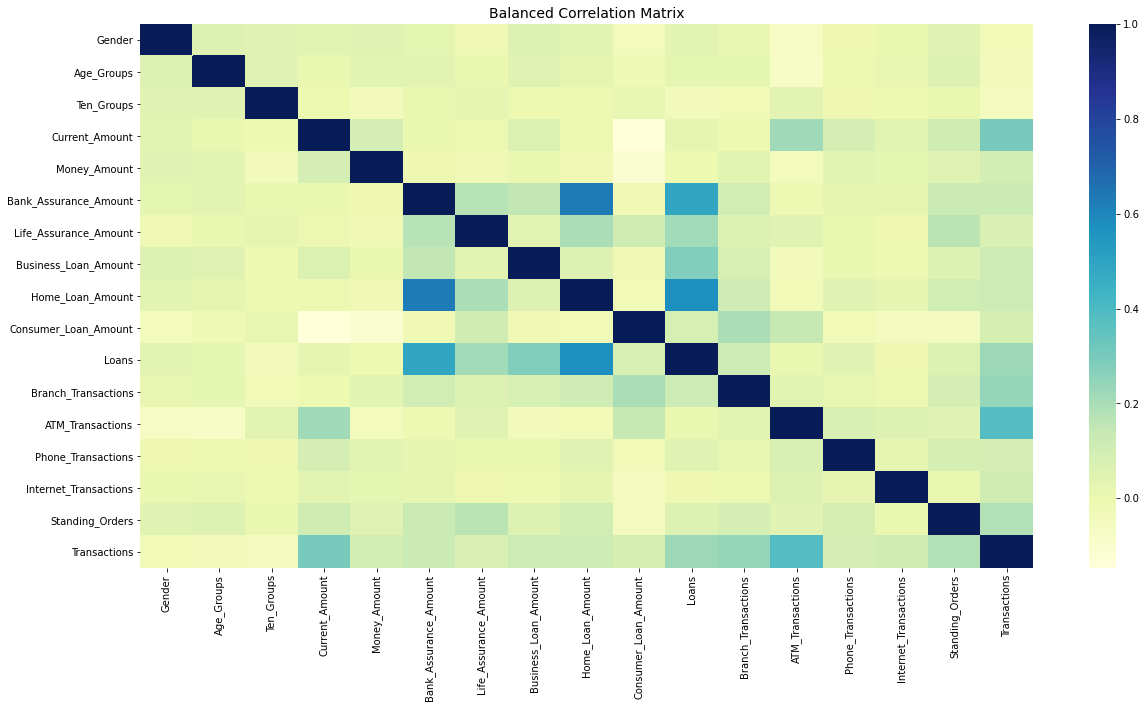

In [29]:
# Sample figsize in inches
fig, ax = plt.subplots(figsize=(20,10))         
# korelace vybalancovaného datasetu
corr = X_train_b.corr()
sns.heatmap(corr, cmap='YlGnBu', annot_kws={'size':30}, ax=ax)
ax.set_title("Balanced Correlation Matrix", fontsize=14)
plt.show()

In [30]:
corr

,Gender,Age_Groups,Ten_Groups,Current_Amount,Money_Amount,Bank_Assurance_Amount,Life_Assurance_Amount,Business_Loan_Amount,Home_Loan_Amount,Consumer_Loan_Amount,Loans,Branch_Transactions,ATM_Transactions,Phone_Transactions,Internet_Transactions,Standing_Orders,Transactions
Gender,1.000000,0.060401,0.044401,0.037523,0.043657,0.032551,-0.016037,0.056453,0.034340,-0.041740,0.036234,0.017642,-0.061180,-0.011676,0.014897,0.048662,-0.025391
Age_Groups,0.060401,1.000000,0.043447,0.008252,0.040634,0.034755,0.008446,0.052811,0.027743,-0.016439,0.029209,0.028829,-0.077274,0.005298,0.015287,0.055509,-0.030335
Ten_Groups,0.044401,0.043447,1.000000,0.001224,-0.033046,0.007470,0.024247,-0.001649,-0.006143,0.023455,-0.035511,-0.026427,0.037185,-0.010442,0.000321,0.010984,-0.046841
Current_Amount,0.037523,0.008252,0.001224,1.000000,0.093744,0.011801,0.004100,0.066406,0.002416,-0.146126,0.028356,-0.002069,0.219506,0.095238,0.034489,0.109800,0.298020
Money_Amount,0.043657,0.040634,-0.033046,0.093744,1.000000,-0.007699,-0.014810,0.007845,-0.011850,-0.108772,0.000148,0.038776,-0.038691,0.037477,0.028707,0.051981,0.096297
Bank_Assurance_Amount,0.032551,0.034755,0.007470,0.011801,-0.007699,1.000000,0.175567,0.150467,0.632750,-0.013117,0.493451,0.102800,-0.007031,0.026250,0.025868,0.129939,0.126845
Life_Assurance_Amount,-0.016037,0.008446,0.024247,0.004100,-0.014810,0.175567,1.000000,0.035812,0.196967,0.109441,0.214325,0.056236,0.050269,0.009722,-0.007443,0.165617,0.069007
Business_Loan_Amount,0.056453,0.052811,-0.001649,0.066406,0.007845,0.150467,0.035812,1.000000,0.059165,-0.012274,0.279813,0.086292,-0.037200,0.013209,-0.005636,0.061182,0.119262
Home_Loan_Amount,0.034340,0.027743,-0.006143,0.002416,-0.011850,0.632750,0.196967,0.059165,1.000000,-0.021538,0.573287,0.117960,-0.027026,0.042913,0.024184,0.107467,0.118221
Consumer_Loan_Amount,-0.041740,-0.016439,0.023455,-0.146126,-0.108772,-0.013117,0.109441,-0.012274,-0.021538,1.000000,0.082342,0.197380,0.144149,-0.021135,-0.047873,-0.050693,0.089930


In [31]:
# StandardScaler pro normalizaci dat
scaler = StandardScaler()
X_train_b = scaler.fit_transform(X_train_b)
X_test_b = scaler.transform(X_test_b)

## Random Forest

In [32]:
rfc = RandomForestClassifier(n_estimators=100, criterion='gini', max_depth=2, min_samples_split=2, min_samples_leaf=1, max_features='auto', bootstrap=True)
acc_rfc_cv=cross_val_score(estimator=rfc,X=X_train_b,y=Y_train_b,cv=10)  #K=10
print("Average accuracy of Random Forest Classifier using K-fold cross validation is :",np.mean(acc_rfc_cv))

rfc.fit(X_train_b, Y_train_b)
y_pred_rfc = rfc.predict(X_test_b)
acc_rfc = metrics.accuracy_score(y_pred_rfc, Y_test_b)
print('Accuracy of test Random Forest Classifier is: ', metrics.accuracy_score(y_pred_rfc, Y_test_b))
print('Classification report: ', classification_report(Y_test_b, y_pred_rfc))
print('Confusion matrix: ', confusion_matrix(Y_test_b, y_pred_rfc))

C:\Users\bardo\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\bardo\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\bardo\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\bardo\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:686: DataConversionWarning: A column-vector y wa

Average accuracy of Random Forest Classifier using K-fold cross validation is : 0.7429779642962563


<ipython-input-32-6bec4ba6aab7>:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc.fit(X_train_b, Y_train_b)


RandomForestClassifier(max_depth=2, max_features='auto')

Accuracy of test Random Forest Classifier is:  0.7744
Classification report:                precision    recall  f1-score   support

           0       0.97      0.78      0.86      2291
           1       0.23      0.71      0.34       209

    accuracy                           0.77      2500
   macro avg       0.60      0.74      0.60      2500
weighted avg       0.91      0.77      0.82      2500

Confusion matrix:  [[1788  503]
 [  61  148]]


#### Optimalizace parametrů 

In [33]:
param_grid = { 
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth' : [2, 3, 4, 5, 6],
    'bootstrap': [True, False],
    'criterion' :['gini', 'entropy'],
}

CV_rfc = GridSearchCV(estimator=RandomForestClassifier(), param_grid=param_grid, cv= 5)
CV_rfc.fit(X_train_b, Y_train_b)
print("tuned hyperparameters :",CV_rfc.best_params_)
print("tuned parameter accuracy (best score):",CV_rfc.best_score_)

C:\Users\bardo\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\bardo\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\bardo\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\bardo\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:686: DataConversionWarning: A column-vector y wa

C:\Users\bardo\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\bardo\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\bardo\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\bardo\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:686: DataConversionWarning: A column-vector y wa

C:\Users\bardo\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\bardo\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\bardo\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\bardo\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:686: DataConversionWarning: A column-vector y wa

C:\Users\bardo\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\bardo\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\bardo\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\bardo\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:686: DataConversionWarning: A column-vector y wa

C:\Users\bardo\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\bardo\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\bardo\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\bardo\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:686: DataConversionWarning: A column-vector y wa

C:\Users\bardo\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\bardo\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\bardo\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\bardo\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:686: DataConversionWarning: A column-vector y wa

C:\Users\bardo\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\bardo\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\bardo\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\bardo\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:686: DataConversionWarning: A column-vector y wa

C:\Users\bardo\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\bardo\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\bardo\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\bardo\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:686: DataConversionWarning: A column-vector y wa

C:\Users\bardo\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\bardo\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\bardo\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\bardo\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:686: DataConversionWarning: A column-vector y wa

C:\Users\bardo\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\bardo\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\bardo\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\bardo\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:686: DataConversionWarning: A column-vector y wa

C:\Users\bardo\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\bardo\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\bardo\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\bardo\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:686: DataConversionWarning: A column-vector y wa

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'bootstrap': [True, False],
                         'criterion': ['gini', 'entropy'],
                         'max_depth': [2, 3, 4, 5, 6],
                         'max_features': ['auto', 'sqrt', 'log2']})

tuned hyperparameters : {'bootstrap': True, 'criterion': 'gini', 'max_depth': 6, 'max_features': 'auto'}
tuned parameter accuracy (best score): 0.8283379048317017


In [34]:
rfc2 = RandomForestClassifier(bootstrap= False, criterion= 'gini', max_depth= 6, max_features= 'sqrt')
acc_rfc_cv2=cross_val_score(estimator=rfc2,X=X_train_b,y=Y_train_b,cv=10)  #K=10
print("Average accuracy of Random Forest Classifier using K-fold cross validation is :",np.mean(acc_rfc_cv2))

rfc2.fit(X_train_b, Y_train_b)
y_pred_rfc2 = rfc2.predict(X_test_b)
acc_rfc2 = metrics.accuracy_score(y_pred_rfc2, Y_test_b)
print('Accuracy of test Random Forest Classifier is: ', metrics.accuracy_score(y_pred_rfc2, Y_test_b))
print('Classification report: ', classification_report(Y_test_b, y_pred_rfc2))
print('Confusion matrix: ', confusion_matrix(Y_test_b, y_pred_rfc2))

C:\Users\bardo\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\bardo\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\bardo\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\bardo\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:686: DataConversionWarning: A column-vector y wa

Average accuracy of Random Forest Classifier using K-fold cross validation is : 0.8254881671992711


<ipython-input-34-08f0827afd42>:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc2.fit(X_train_b, Y_train_b)


RandomForestClassifier(bootstrap=False, max_depth=6)

Accuracy of test Random Forest Classifier is:  0.808
Classification report:                precision    recall  f1-score   support

           0       0.97      0.82      0.89      2291
           1       0.25      0.67      0.37       209

    accuracy                           0.81      2500
   macro avg       0.61      0.75      0.63      2500
weighted avg       0.91      0.81      0.84      2500

Confusion matrix:  [[1879  412]
 [  68  141]]


<AxesSubplot:>

Text(0.5, 42.0, 'PREDICTED LABEL')

Text(42.0, 0.5, 'TRUE LABEL')

Text(0.5, 1.0, 'Confusion Matrix')

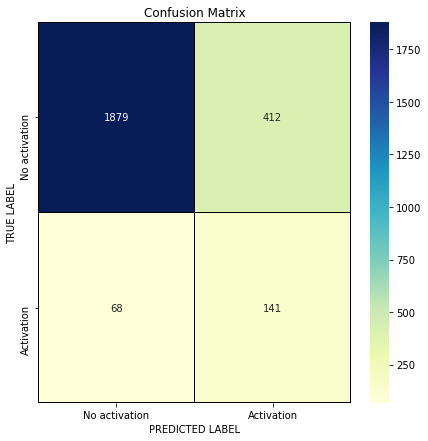

In [35]:
cm = confusion_matrix(Y_test_b, y_pred_rfc2)
x_axis_labels = ["No activation", "Activation"]
y_axis_labels = ["No activation", "Activation"]
f, ax = plt.subplots(figsize =(7,7))
sns.heatmap(cm, annot = True, linewidths=0.2, linecolor="black", fmt = ".0f", ax=ax, cmap='YlGnBu', xticklabels=x_axis_labels, yticklabels=y_axis_labels)
plt.xlabel("PREDICTED LABEL")
plt.ylabel("TRUE LABEL")
plt.title('Confusion Matrix')
#plt.savefig("dtcm.png", format='png', dpi=500, bbox_inches='tight')
plt.show()

## Decision Tree 

In [36]:
dtc = DecisionTreeClassifier(criterion='entropy', max_depth=2, min_samples_split=2, min_samples_leaf=1)
acc_dtc_cv=cross_val_score(estimator=dtc,X=X_train_b,y=Y_train_b,cv=10)  #K=10
print("Average accuracy of Decision Classifier using K-fold cross validation is :",np.mean(acc_dtc_cv))

dtc.fit(X_train_b, Y_train_b)
y_pred_dtc = dtc.predict(X_test_b)
acc_dtc = metrics.accuracy_score(y_pred_dtc, Y_test_b)
print('Accuracy of test Decision Tree Classifier is: ', metrics.accuracy_score(y_pred_dtc, Y_test_b))
print('Classification report: ', classification_report(Y_test_b, y_pred_dtc))
print('Confusion matrix: ', confusion_matrix(Y_test_b, y_pred_dtc))

Average accuracy of Decision Classifier using K-fold cross validation is : 0.6958031203343642


DecisionTreeClassifier(criterion='entropy', max_depth=2)

Accuracy of test Decision Tree Classifier is:  0.5756
Classification report:                precision    recall  f1-score   support

           0       0.97      0.55      0.70      2291
           1       0.14      0.83      0.25       209

    accuracy                           0.58      2500
   macro avg       0.56      0.69      0.48      2500
weighted avg       0.90      0.58      0.67      2500

Confusion matrix:  [[1265 1026]
 [  35  174]]


#### Optimalizace parametrů 

In [37]:
grid = {'criterion' : ['gini', 'entropy'],
       'max_depth' : np.arange(1,10),
       'min_samples_split' : np.arange(2,10),
       'max_features' : ['auto', 'sqrt', 'log2']}

CV_dtc = GridSearchCV(estimator=DecisionTreeClassifier(), param_grid=grid, cv=5)
CV_dtc.fit(X_train_b, Y_train_b)
print("tuned hyperparameters :",CV_dtc.best_params_)
print("tuned parameter accuracy (best score):",CV_dtc.best_score_)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': array([1, 2, 3, 4, 5, 6, 7, 8, 9]),
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'min_samples_split': array([2, 3, 4, 5, 6, 7, 8, 9])})

tuned hyperparameters : {'criterion': 'gini', 'max_depth': 9, 'max_features': 'sqrt', 'min_samples_split': 9}
tuned parameter accuracy (best score): 0.8167080397299094


In [38]:
dtc2 = DecisionTreeClassifier(criterion='gini', max_depth=9, min_samples_split=8, min_samples_leaf=9, max_features='auto')
acc_dtc_cv2=cross_val_score(estimator=dtc,X=X_train_b,y=Y_train_b,cv=10)  #K=10
print("Average accuracy of Decision Classifier using K-fold cross validation is :",np.mean(acc_dtc_cv2))

dtc2.fit(X_train_b, Y_train_b)
y_pred_dtc2 = dtc2.predict(X_test_b)
acc_dtc2 = metrics.accuracy_score(y_pred_dtc2, Y_test_b)
print('Accuracy of test Decision Tree Classifier is: ', metrics.accuracy_score(y_pred_dtc2, Y_test_b))
print('Classification report: ', classification_report(Y_test_b, y_pred_dtc2))
print('Confusion matrix: ', confusion_matrix(Y_test_b, y_pred_dtc2))

Average accuracy of Decision Classifier using K-fold cross validation is : 0.6958031203343642


DecisionTreeClassifier(max_depth=9, max_features='auto', min_samples_leaf=9,
                       min_samples_split=8)

Accuracy of test Decision Tree Classifier is:  0.84
Classification report:                precision    recall  f1-score   support

           0       0.95      0.87      0.91      2291
           1       0.27      0.53      0.36       209

    accuracy                           0.84      2500
   macro avg       0.61      0.70      0.63      2500
weighted avg       0.90      0.84      0.86      2500

Confusion matrix:  [[1989  302]
 [  98  111]]


<AxesSubplot:>

Text(0.5, 42.0, 'PREDICTED LABEL')

Text(42.0, 0.5, 'TRUE LABEL')

Text(0.5, 1.0, 'Confusion Matrix')

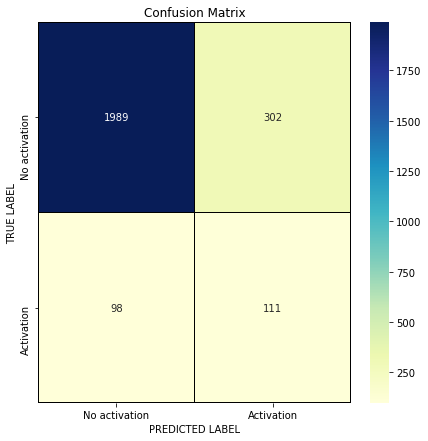

In [39]:
cm = confusion_matrix(Y_test_b, y_pred_dtc2)
x_axis_labels = ["No activation", "Activation"]
y_axis_labels = ["No activation", "Activation"]
f, ax = plt.subplots(figsize =(7,7))
sns.heatmap(cm, annot = True, linewidths=0.2, linecolor="black", fmt = ".0f", ax=ax, cmap='YlGnBu', xticklabels=x_axis_labels, yticklabels=y_axis_labels)
plt.xlabel("PREDICTED LABEL")
plt.ylabel("TRUE LABEL")
plt.title('Confusion Matrix')
#plt.savefig("dtcm.png", format='png', dpi=500, bbox_inches='tight')
plt.show()

#### Důležitost parametrů dle DT

In [40]:
model = DecisionTreeClassifier(criterion='gini', max_depth=9, min_samples_split=8, min_samples_leaf=1, max_features='log2') # XGBClassifier()
model.fit(X_train_b, Y_train_b)
pd.DataFrame({'Variable':X.columns,
              'Importance':model.feature_importances_}).sort_values('Importance', ascending=False)




DecisionTreeClassifier(max_depth=9, max_features='log2', min_samples_split=8)

,Variable,Importance
16,Transactions,0.326009
4,Money_Amount,0.221065
10,Loans,0.182495
1,Age_Groups,0.058650
11,Branch_Transactions,0.049062
12,ATM_Transactions,0.033547
2,Ten_Groups,0.025846
14,Internet_Transactions,0.019508
5,Bank_Assurance_Amount,0.016379
3,Current_Amount,0.013755


## Logistic Regression

In [41]:
lr = LogisticRegression(penalty='l2', C=1.0, max_iter=100)
acc_lr_cv=cross_val_score(estimator=lr,X=X_train_b,y=Y_train_b,cv=10)  #K=10
print("Average accuracy of Logistic Regression using K-fold cross validation is :",np.mean(acc_lr_cv))

lr.fit(X_train_b, Y_train_b)
y_pred_lr = lr.predict(X_test_b)
acc_lr = metrics.accuracy_score(y_pred_lr, Y_test_b)
print('Accuracy of Logistic Regression is: ', metrics.accuracy_score(y_pred_lr, Y_test_b))
print('Classification report: ', classification_report(Y_test_b, y_pred_lr))
print('Confusion matrix: ', confusion_matrix(Y_test_b, y_pred_lr))

C:\Users\bardo\anaconda3\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\bardo\anaconda3\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\bardo\anaconda3\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\bardo\anaconda3\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,

Average accuracy of Logistic Regression using K-fold cross validation is : 0.7347179977498


C:\Users\bardo\anaconda3\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\bardo\anaconda3\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression()

Accuracy of Logistic Regression is:  0.748
Classification report:                precision    recall  f1-score   support

           0       0.95      0.76      0.85      2291
           1       0.18      0.58      0.28       209

    accuracy                           0.75      2500
   macro avg       0.57      0.67      0.56      2500
weighted avg       0.89      0.75      0.80      2500

Confusion matrix:  [[1749  542]
 [  88  121]]


In [42]:
grid = {'penalty': ['l1', 'l2'],
        'solver': ['newton-cg', 'lbfgs', 'liblinear'],
     'C': [0.001, 0.01, 0.1, 1, 10, 100]}

CV_lr = GridSearchCV(estimator=LogisticRegression(), param_grid=grid, cv= 5)
CV_lr.fit(X_train_b, Y_train_b)
print("tuned hyperparameters :",CV_lr.best_params_)
print("tuned parameter accuracy (best score):",CV_lr.best_score_)

C:\Users\bardo\anaconda3\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\bardo\anaconda3\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\bardo\anaconda3\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\bardo\anaconda3\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,

C:\Users\bardo\anaconda3\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\bardo\anaconda3\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\bardo\anaconda3\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\bardo\anaconda3\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,

C:\Users\bardo\anaconda3\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\bardo\anaconda3\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\bardo\anaconda3\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\bardo\anaconda3\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,

C:\Users\bardo\anaconda3\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\bardo\anaconda3\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\bardo\anaconda3\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\bardo\anaconda3\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,

GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100],
                         'penalty': ['l1', 'l2'],
                         'solver': ['newton-cg', 'lbfgs', 'liblinear']})

tuned hyperparameters : {'C': 10, 'penalty': 'l1', 'solver': 'liblinear'}
tuned parameter accuracy (best score): 0.7327413878186396


#### Optimalizace parametrů 


In [43]:
lr2 = LogisticRegression(penalty='l2', C=10, solver = 'newton-cg')
acc_lr_cv2=cross_val_score(estimator=lr2,X=X_train_b,y=Y_train_b,cv=10)  #K=10
print("Average accuracy of Logistic Regression using K-fold cross validation is :",np.mean(acc_lr_cv2))

lr2.fit(X_train_b, Y_train_b)
y_pred_lr2 = lr2.predict(X_test_b)
acc_lr2 = metrics.accuracy_score(y_pred_lr2, Y_test_b)
print('Accuracy of Logistic Regression is: ', metrics.accuracy_score(y_pred_lr2, Y_test_b))
print('Classification report: ', classification_report(Y_test_b, y_pred_lr2))
print('Confusion matrix: ', confusion_matrix(Y_test_b, y_pred_lr2))

C:\Users\bardo\anaconda3\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\bardo\anaconda3\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\bardo\anaconda3\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\bardo\anaconda3\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,

Average accuracy of Logistic Regression using K-fold cross validation is : 0.7347179977498


C:\Users\bardo\anaconda3\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression(C=10, solver='newton-cg')

Accuracy of Logistic Regression is:  0.7476
Classification report:                precision    recall  f1-score   support

           0       0.95      0.76      0.85      2291
           1       0.18      0.57      0.28       209

    accuracy                           0.75      2500
   macro avg       0.57      0.67      0.56      2500
weighted avg       0.89      0.75      0.80      2500

Confusion matrix:  [[1749  542]
 [  89  120]]


<AxesSubplot:>

Text(0.5, 42.0, 'PREDICTED LABEL')

Text(42.0, 0.5, 'TRUE LABEL')

Text(0.5, 1.0, 'Confusion Matrix')

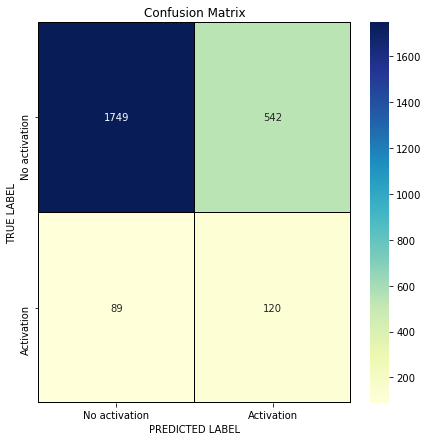

In [44]:
cm = confusion_matrix(Y_test_b, y_pred_lr2)
x_axis_labels = ["No activation", "Activation"]
y_axis_labels = ["No activation", "Activation"]
f, ax = plt.subplots(figsize =(7,7))
sns.heatmap(cm, annot = True, linewidths=0.2, linecolor="black", fmt = ".0f", ax=ax, cmap='YlGnBu', xticklabels=x_axis_labels, yticklabels=y_axis_labels)
plt.xlabel("PREDICTED LABEL")
plt.ylabel("TRUE LABEL")
plt.title('Confusion Matrix')
#plt.savefig("dtcm.png", format='png', dpi=500, bbox_inches='tight')
plt.show()

## KNN CLassifier

In [45]:
knc = KNeighborsClassifier(n_neighbors=5)
acc_knc_cv=cross_val_score(estimator=knc,X=X_train_b,y=Y_train_b,cv=10)  #K=10
print("Average accuracy of KNN classifier using K-fold cross validation is :",np.mean(acc_knc_cv))

knc.fit(X_train_b, Y_train_b)
y_pred_knc = knc.predict(X_test_b)
acc_knc = metrics.accuracy_score(y_pred_knc, Y_test_b)
print('Accuracy of KNN classifier is: ', metrics.accuracy_score(y_pred_knc, Y_test_b))
print('Classification report: ', classification_report(Y_test_b, y_pred_knc))
print('Confusion matrix: ', confusion_matrix(Y_test_b, y_pred_knc))

C:\Users\bardo\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:207: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\bardo\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:207: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\bardo\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:207: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\bardo\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:207: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_sam

Average accuracy of KNN classifier using K-fold cross validation is : 0.8416539932494


C:\Users\bardo\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:207: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


KNeighborsClassifier()

Accuracy of KNN classifier is:  0.782
Classification report:                precision    recall  f1-score   support

           0       0.95      0.81      0.87      2291
           1       0.20      0.52      0.28       209

    accuracy                           0.78      2500
   macro avg       0.57      0.66      0.58      2500
weighted avg       0.89      0.78      0.82      2500

Confusion matrix:  [[1847  444]
 [ 101  108]]


###  Optimalizace parametrů 

In [46]:
grid ={"n_neighbors":np.arange(1,10), 'weights':['uniform', 'distance']}
CV_knc=GridSearchCV(KNeighborsClassifier(),grid,cv=10)#K=10 
CV_knc.fit(X_train_b,Y_train_b)
print("tuned hyperparameter K:",CV_knc.best_params_)
print("tuned parameter accuracy (best score):",CV_knc.best_score_)

C:\Users\bardo\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:207: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\bardo\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:207: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\bardo\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:207: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\bardo\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:207: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_sam

C:\Users\bardo\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:207: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\bardo\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:207: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\bardo\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:207: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\bardo\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:207: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_sam

C:\Users\bardo\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:207: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\bardo\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:207: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\bardo\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:207: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\bardo\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:207: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_sam

C:\Users\bardo\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:207: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\bardo\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:207: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\bardo\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:207: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\bardo\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:207: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_sam

C:\Users\bardo\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:207: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\bardo\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:207: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\bardo\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:207: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\bardo\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:207: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_sam

C:\Users\bardo\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:207: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\bardo\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:207: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\bardo\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:207: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\bardo\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:207: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_sam

GridSearchCV(cv=10, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': array([1, 2, 3, 4, 5, 6, 7, 8, 9]),
                         'weights': ['uniform', 'distance']})

tuned hyperparameter K: {'n_neighbors': 1, 'weights': 'uniform'}
tuned parameter accuracy (best score): 0.8658656746108138


In [47]:
knc2 = KNeighborsClassifier(n_neighbors=1, weights = 'uniform')
acc_knc_cv2 = cross_val_score(estimator=knc2,X=X_train_b,y=Y_train_b,cv=10)  #K=10
print("Average accuracy of KNN classifier using K-fold cross validation is :",np.mean(acc_knc_cv2))

knc2.fit(X_train_b, Y_train_b)
y_pred_knc2 = knc2.predict(X_test_b)
acc_knc2 = metrics.accuracy_score(y_pred_knc2, Y_test_b)
print('Accuracy of KNN classifier is: ', metrics.accuracy_score(y_pred_knc2, Y_test_b))
print('Classification report: ', classification_report(Y_test_b, y_pred_knc2))
print('Confusion matrix: ', confusion_matrix(Y_test_b, y_pred_knc2))

C:\Users\bardo\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:207: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\bardo\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:207: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\bardo\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:207: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\bardo\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:207: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_sam

Average accuracy of KNN classifier using K-fold cross validation is : 0.8658656746108138


C:\Users\bardo\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:207: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


KNeighborsClassifier(n_neighbors=1)

Accuracy of KNN classifier is:  0.81
Classification report:                precision    recall  f1-score   support

           0       0.94      0.84      0.89      2291
           1       0.20      0.44      0.28       209

    accuracy                           0.81      2500
   macro avg       0.57      0.64      0.58      2500
weighted avg       0.88      0.81      0.84      2500

Confusion matrix:  [[1934  357]
 [ 118   91]]


<AxesSubplot:>

Text(0.5, 42.0, 'PREDICTED LABEL')

Text(42.0, 0.5, 'TRUE LABEL')

Text(0.5, 1.0, 'Confusion Matrix')

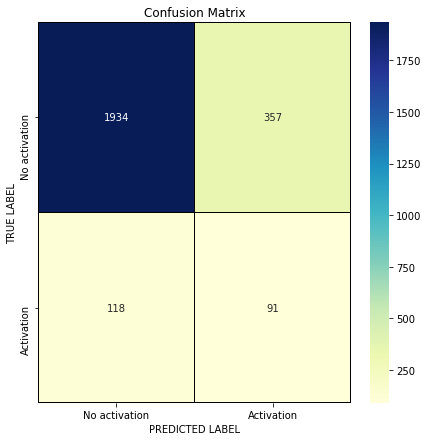

In [48]:
cm = confusion_matrix(Y_test_b, y_pred_knc2)
x_axis_labels = ["No activation", "Activation"]
y_axis_labels = ["No activation", "Activation"]
f, ax = plt.subplots(figsize =(7,7))
sns.heatmap(cm, annot = True, linewidths=0.2, linecolor="black", fmt = ".0f", ax=ax, cmap='YlGnBu', xticklabels=x_axis_labels, yticklabels=y_axis_labels)
plt.xlabel("PREDICTED LABEL")
plt.ylabel("TRUE LABEL")
plt.title('Confusion Matrix')
#plt.savefig("dtcm.png", format='png', dpi=500, bbox_inches='tight')
plt.show()

## Gradient Boost

In [49]:
gbc = GradientBoostingClassifier()
acc_gbc_cv=cross_val_score(estimator=knc,X=X_train_b,y=Y_train_b,cv=10)  #K=10
print("Average accuracy of Gradient Boosting classifier using K-fold cross validation is :",np.mean(acc_gbc_cv))

gbc.fit(X_train_b, Y_train_b)
y_pred_gbc = gbc.predict(X_test_b)
acc_gbc = metrics.accuracy_score(y_pred_gbc, Y_test_b)
print('Accuracy of Gradient Boosting classifier is: ', metrics.accuracy_score(y_pred_gbc, Y_test_b))
print('Classification report: ', classification_report(Y_test_b, y_pred_gbc))
print('Confusion matrix: ', confusion_matrix(Y_test_b, y_pred_gbc))

C:\Users\bardo\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:207: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\bardo\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:207: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\bardo\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:207: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\bardo\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:207: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_sam

Average accuracy of Gradient Boosting classifier using K-fold cross validation is : 0.8416539932494


C:\Users\bardo\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py:570: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


GradientBoostingClassifier()

Accuracy of Gradient Boosting classifier is:  0.8248
Classification report:                precision    recall  f1-score   support

           0       0.96      0.84      0.90      2291
           1       0.26      0.61      0.37       209

    accuracy                           0.82      2500
   macro avg       0.61      0.73      0.63      2500
weighted avg       0.90      0.82      0.85      2500

Confusion matrix:  [[1934  357]
 [  81  128]]


### Optimalizace parametrů 

In [50]:
grid = {
       'loss': ['deviance', 'exponential'],
       'learning_rate' : [0.001, 0.01, 0.1]}
CV_gbc = GridSearchCV(estimator=GradientBoostingClassifier(),param_grid=grid, cv=5)
CV_gbc.fit(X_train_b, Y_train_b)
print("tuned hyperparameters :",CV_gbc.best_params_)
print("tuned parameter accuracy (best score):",CV_gbc.best_score_)

C:\Users\bardo\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py:570: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\bardo\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py:570: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\bardo\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py:570: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\bardo\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py:570: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example usin

GridSearchCV(cv=5, estimator=GradientBoostingClassifier(),
             param_grid={'learning_rate': [0.001, 0.01, 0.1],
                         'loss': ['deviance', 'exponential']})

tuned hyperparameters : {'learning_rate': 0.1, 'loss': 'deviance'}
tuned parameter accuracy (best score): 0.8519638809279584


In [51]:
gbc2 = GradientBoostingClassifier(learning_rate=0.1, n_estimators=70, loss='deviance')
acc_gbc_cv2 = cross_val_score(estimator=gbc2,X=X_train_b,y=Y_train_b,cv=10)  #K=10
print("Average accuracy of  Gradient Boosting classifier using K-fold cross validation is :",np.mean(acc_gbc_cv2))

gbc2.fit(X_train_b, Y_train_b)
y_pred_gbc2 = gbc2.predict(X_test_b)
acc_gbc2 = accuracy_score(Y_test_b, y_pred_gbc2)
print('Accuracy of Gradient Boosting classifier is: ', accuracy_score(Y_test_b, y_pred_gbc2))
print('Classification report: ', classification_report(Y_test_b, y_pred_gbc2))
print('Confusion matrix: ', confusion_matrix(Y_test_b, y_pred_gbc2))

C:\Users\bardo\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py:570: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\bardo\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py:570: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\bardo\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py:570: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\bardo\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py:570: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example usin

Average accuracy of  Gradient Boosting classifier using K-fold cross validation is : 0.842823583892675


C:\Users\bardo\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py:570: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


GradientBoostingClassifier(loss='deviance', n_estimators=70)

Accuracy of Gradient Boosting classifier is:  0.8136
Classification report:                precision    recall  f1-score   support

           0       0.96      0.83      0.89      2291
           1       0.26      0.66      0.37       209

    accuracy                           0.81      2500
   macro avg       0.61      0.74      0.63      2500
weighted avg       0.90      0.81      0.85      2500

Confusion matrix:  [[1897  394]
 [  72  137]]


<AxesSubplot:>

Text(0.5, 42.0, 'PREDICTED LABEL')

Text(42.0, 0.5, 'TRUE LABEL')

Text(0.5, 1.0, 'Confusion Matrix')

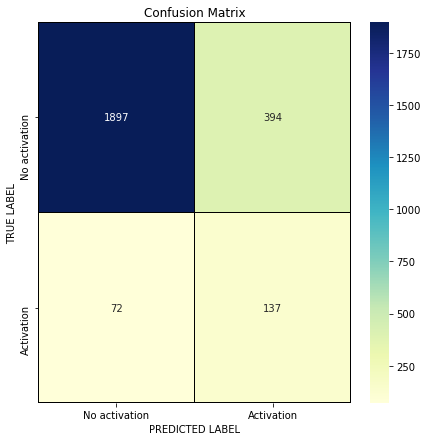

In [52]:
cm = confusion_matrix(Y_test_b, y_pred_gbc2)
x_axis_labels = ["No activation", "Activation"]
y_axis_labels = ["No activation", "Activation"]
f, ax = plt.subplots(figsize =(7,7))
sns.heatmap(cm, annot = True, linewidths=0.2, linecolor="black", fmt = ".0f", ax=ax, cmap='YlGnBu', xticklabels=x_axis_labels, yticklabels=y_axis_labels)
plt.xlabel("PREDICTED LABEL")
plt.ylabel("TRUE LABEL")
plt.title('Confusion Matrix')
#plt.savefig("dtcm.png", format='png', dpi=500, bbox_inches='tight')
plt.show()

#### Důležitost parametrů 

In [53]:
model =GradientBoostingClassifier(learning_rate=0.1, n_estimators=70, loss='deviance')
model.fit(X_train_b, Y_train_b)
pd.DataFrame({'Variable':X.columns,
              'Importance':model.feature_importances_}).sort_values('Importance', ascending=False)

C:\Users\bardo\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py:570: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


GradientBoostingClassifier(loss='deviance', n_estimators=70)

,Variable,Importance
16,Transactions,0.404866
4,Money_Amount,0.159625
10,Loans,0.127053
3,Current_Amount,0.064059
12,ATM_Transactions,0.051591
2,Ten_Groups,0.050456
1,Age_Groups,0.034229
15,Standing_Orders,0.029238
11,Branch_Transactions,0.025422
14,Internet_Transactions,0.019597


## Bagging Classifier

In [54]:
bagclf = BaggingClassifier(n_estimators=100, bootstrap_features=True)
acc_bagclf_cv = cross_val_score(estimator=bagclf,X=X_train_b,y=Y_train_b,cv=10)  #K=10
print("Average accuracy of Bagging classifier using K-fold cross validation is :",np.mean(acc_bagclf_cv))

bagclf.fit(X_train_b,Y_train_b)
y_pred_bagclf = bagclf.predict(X_test_b)
acc_bagclf = accuracy_score(Y_test_b, y_pred_bagclf)
print('Accuracy of Bagging classifier is: ', accuracy_score(Y_test_b, y_pred_bagclf))
print('Classification report: ', classification_report(Y_test_b, y_pred_bagclf))
print('Confusion matrix: ', confusion_matrix(Y_test_b, y_pred_bagclf))

C:\Users\bardo\anaconda3\lib\site-packages\sklearn\ensemble\_bagging.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\bardo\anaconda3\lib\site-packages\sklearn\ensemble\_bagging.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\bardo\anaconda3\lib\site-packages\sklearn\ensemble\_bagging.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\bardo\anaconda3\lib\site-packages\sklearn\ensemble\_bagging.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,

Average accuracy of Bagging classifier using K-fold cross validation is : 0.9293503510055314


C:\Users\bardo\anaconda3\lib\site-packages\sklearn\ensemble\_bagging.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


BaggingClassifier(bootstrap_features=True, n_estimators=100)

Accuracy of Bagging classifier is:  0.8876
Classification report:                precision    recall  f1-score   support

           0       0.95      0.92      0.94      2291
           1       0.37      0.49      0.42       209

    accuracy                           0.89      2500
   macro avg       0.66      0.71      0.68      2500
weighted avg       0.90      0.89      0.89      2500

Confusion matrix:  [[2116  175]
 [ 106  103]]


### Optimalizace parametrů

In [55]:
grid = {
       'bootstrap' : ['True', 'False'],
       'bootstrap_features' : ['True', 'False']}

CV_bagclf = GridSearchCV(estimator=BaggingClassifier(), param_grid=grid, cv=5)
CV_bagclf.fit(X_train_b, Y_train_b)
print("tuned hyperparameters :",CV_bagclf.best_params_)
print("tuned parameter accuracy (best score):",CV_bagclf.best_score_)

C:\Users\bardo\anaconda3\lib\site-packages\sklearn\ensemble\_bagging.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\bardo\anaconda3\lib\site-packages\sklearn\ensemble\_bagging.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\bardo\anaconda3\lib\site-packages\sklearn\ensemble\_bagging.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\bardo\anaconda3\lib\site-packages\sklearn\ensemble\_bagging.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,

GridSearchCV(cv=5, estimator=BaggingClassifier(),
             param_grid={'bootstrap': ['True', 'False'],
                         'bootstrap_features': ['True', 'False']})

tuned hyperparameters : {'bootstrap': 'False', 'bootstrap_features': 'False'}
tuned parameter accuracy (best score): 0.9024302540023456


In [56]:
bagclf2 = BaggingClassifier(n_estimators=100, bootstrap=True, bootstrap_features=False)
acc_bagclf_cv2 = cross_val_score(estimator=bagclf2,X=X_train_b,y=Y_train_b,cv=10)  #K=10
print("Average accuracy of Bagging classifier using K-fold cross validation is :",np.mean(acc_bagclf_cv2))

bagclf2.fit(X_train_b, Y_train_b)
y_pred_bagclf2 = bagclf2.predict(X_test_b)
acc_bagclf2 = accuracy_score(Y_test_b, y_pred_bagclf2)
print('Accuracy of Bagging classifier is: ', accuracy_score(Y_test_b, y_pred_bagclf2))
print('Classification report: ', classification_report(Y_test_b, y_pred_bagclf2))
print('Confusion matrix: ', confusion_matrix(Y_test_b, y_pred_bagclf2))

C:\Users\bardo\anaconda3\lib\site-packages\sklearn\ensemble\_bagging.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\bardo\anaconda3\lib\site-packages\sklearn\ensemble\_bagging.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\bardo\anaconda3\lib\site-packages\sklearn\ensemble\_bagging.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\bardo\anaconda3\lib\site-packages\sklearn\ensemble\_bagging.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,

Average accuracy of Bagging classifier using K-fold cross validation is : 0.9210864808326595


BaggingClassifier(n_estimators=100)

Accuracy of Bagging classifier is:  0.8728
Classification report:                precision    recall  f1-score   support

           0       0.95      0.91      0.93      2291
           1       0.32      0.47      0.38       209

    accuracy                           0.87      2500
   macro avg       0.64      0.69      0.66      2500
weighted avg       0.90      0.87      0.88      2500

Confusion matrix:  [[2084  207]
 [ 111   98]]


<AxesSubplot:>

Text(0.5, 42.0, 'PREDICTED LABEL')

Text(42.0, 0.5, 'TRUE LABEL')

Text(0.5, 1.0, 'Confusion Matrix')

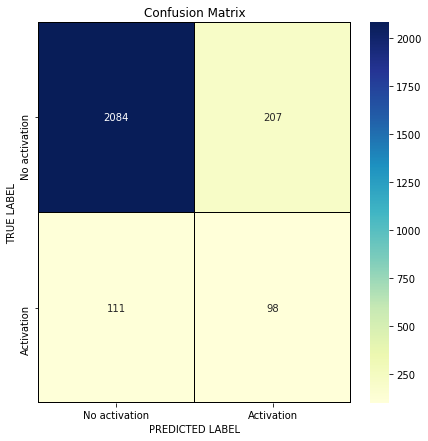

In [57]:
cm = confusion_matrix(Y_test_b,y_pred_bagclf2)
x_axis_labels = ["No activation", "Activation"]
y_axis_labels = ["No activation", "Activation"]
f, ax = plt.subplots(figsize =(7,7))
sns.heatmap(cm, annot = True, linewidths=0.2, linecolor="black", fmt = ".0f", ax=ax, cmap='YlGnBu', xticklabels=x_axis_labels, yticklabels=y_axis_labels)
plt.xlabel("PREDICTED LABEL")
plt.ylabel("TRUE LABEL")
plt.title('Confusion Matrix')
#plt.savefig("dtcm.png", format='png', dpi=500, bbox_inches='tight')
plt.show()

# Srovnání modelů bez optimalizace

,Model,Score
1,DecisionTree,0.5756
2,LogisticRegression,0.7480
0,RandomForest,0.7744
3,KNN,0.7820
5,GradientBoost,0.8248
4,BaggingClassifier,0.8876


<AxesSubplot:xlabel='Model', ylabel='Score'>

Text(0.5, 0, 'Klasifikátory')

Text(0, 0.5, 'Přesnost')

Text(0.5, 1.0, 'Klasifikátory vs Přesnost')

(0.0, 0.95)

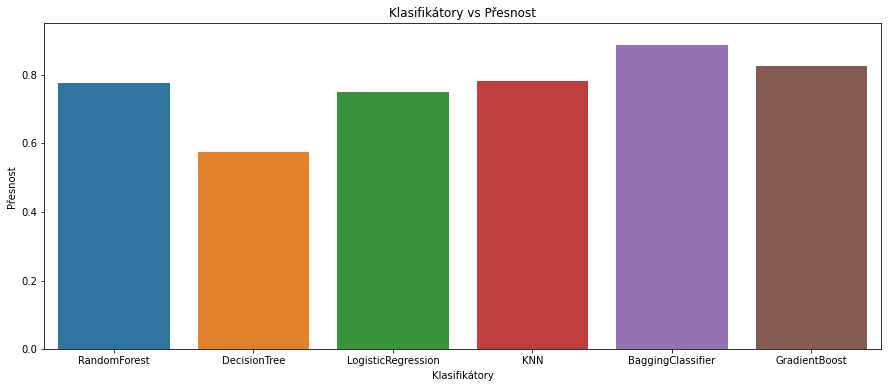

In [58]:
models = pd.DataFrame({'Model' : ['RandomForest', 'DecisionTree', 'LogisticRegression', 'KNN', 'BaggingClassifier', 'GradientBoost'], 
                      'Score' : [acc_rfc, acc_dtc, acc_lr, acc_knc, acc_bagclf, acc_gbc]})
models.sort_values(by='Score', ascending=True)
fig, ax=plt.subplots(figsize=(15,6))
sns.barplot(x='Model',y='Score', data=models)
ax.set_xlabel('Klasifikátory')
ax.set_ylabel('Přesnost')
ax.set_title('Klasifikátory vs Přesnost')
ax.set_ylim([0, 0.95])
plt.show()

# Srovnání modelů s optimalizací

,Model,Score
2,LogisticRegression,0.7476
0,RandomForest,0.8080
3,KNN,0.8100
5,GradientBoost,0.8136
1,DecisionTree,0.8400
4,BaggingClassifier,0.8728


<AxesSubplot:xlabel='Model', ylabel='Score'>

Text(0.5, 0, 'Klasifikátory')

Text(0, 0.5, 'GB Přesnost')

Text(0.5, 1.0, 'Klasifikátory vs GBPřesnost')

(0.0, 0.95)

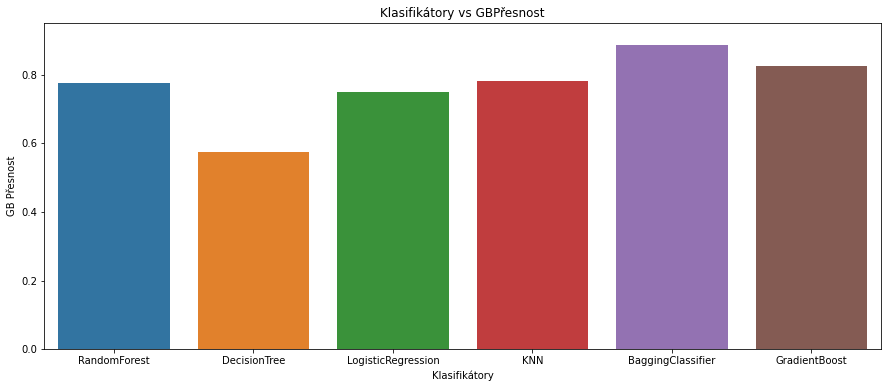

In [59]:
models2 = pd.DataFrame({'Model' : ['RandomForest', 'DecisionTree', 'LogisticRegression', 'KNN', 'BaggingClassifier', 'GradientBoost'], 
                      'Score' : [acc_rfc2, acc_dtc2, acc_lr2, acc_knc2, acc_bagclf2, acc_gbc2]})
models2.sort_values(by='Score', ascending=True)
fig, ax=plt.subplots(figsize=(15,6))
sns.barplot(x='Model',y='Score', data=models)
ax.set_xlabel('Klasifikátory')
ax.set_ylabel('GB Přesnost')
ax.set_title('Klasifikátory vs GBPřesnost')
ax.set_ylim([0, 0.95])
plt.show()

# ROC křivky modelů

<AxesSubplot:title={'center':'ROC Curves'}, xlabel='False Positive Rate', ylabel='True Positive Rate'>

Text(0.5, 1.0, 'ROC curve for test samples using Random Forest')

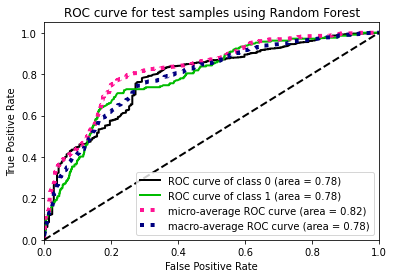

In [60]:
y_pred_rfc_prob = rfc.predict_proba(X_test_b)
skplt.metrics.plot_roc(Y_test_b, y_pred_rfc_prob)
plt.title('ROC curve for test samples using Random Forest')
plt.show()

<AxesSubplot:title={'center':'ROC Curves'}, xlabel='False Positive Rate', ylabel='True Positive Rate'>

Text(0.5, 1.0, 'ROC curve for test samples using Decision Tree')

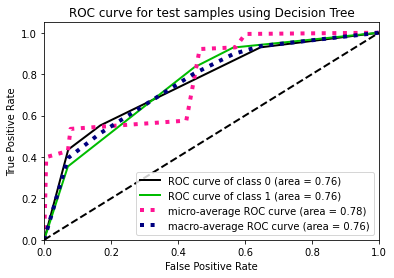

In [61]:
y_pred_dtc_prob = dtc.predict_proba(X_test_b)
skplt.metrics.plot_roc(Y_test_b, y_pred_dtc_prob)
plt.title('ROC curve for test samples using Decision Tree')
plt.show()

<AxesSubplot:title={'center':'ROC Curves'}, xlabel='False Positive Rate', ylabel='True Positive Rate'>

Text(0.5, 1.0, 'ROC curve for test samples using Logistic regressor')

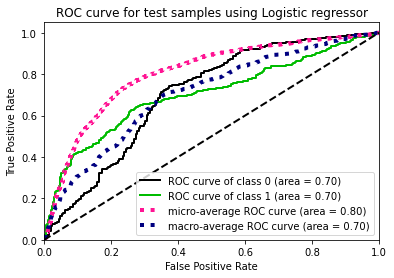

In [62]:
y_pred_lr_prob = lr.predict_proba(X_test_b)
skplt.metrics.plot_roc(Y_test_b, y_pred_lr_prob)
plt.title('ROC curve for test samples using Logistic regressor')
plt.show()

<AxesSubplot:title={'center':'ROC Curves'}, xlabel='False Positive Rate', ylabel='True Positive Rate'>

Text(0.5, 1.0, 'ROC curve for test samples using KNN')

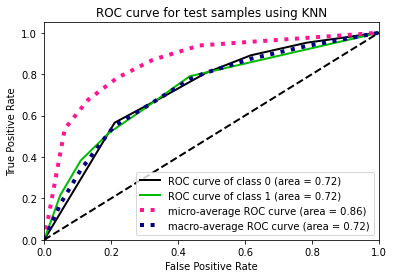

In [63]:
y_pred_knc_prob = knc.predict_proba(X_test_b)
skplt.metrics.plot_roc(Y_test_b, y_pred_knc_prob)
plt.title('ROC curve for test samples using KNN')
plt.show()

<AxesSubplot:title={'center':'ROC Curves'}, xlabel='False Positive Rate', ylabel='True Positive Rate'>

Text(0.5, 1.0, 'ROC curve for test samples using Bagging Classifier')

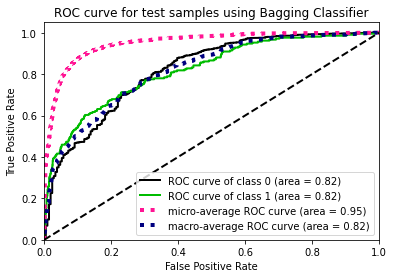

In [64]:
y_pred_bagclf_prob = bagclf.predict_proba(X_test_b)
skplt.metrics.plot_roc(Y_test_b, y_pred_bagclf_prob)
plt.title('ROC curve for test samples using Bagging Classifier')
plt.show()

<AxesSubplot:title={'center':'ROC Curves'}, xlabel='False Positive Rate', ylabel='True Positive Rate'>

Text(0.5, 1.0, 'ROC curve for test samples using GradientBoosting Classifier')

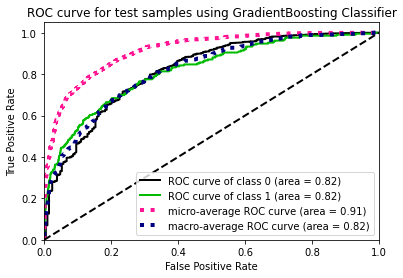

In [65]:
y_pred_gbc_prob = gbc.predict_proba(X_test_b)
skplt.metrics.plot_roc(Y_test_b, y_pred_gbc_prob)
plt.title('ROC curve for test samples using GradientBoosting Classifier')
plt.show()

# Senzitivita a specifita modelů

In [66]:
cm1 =confusion_matrix(Y_test_b, y_pred_lr)
sensitivity1 = cm1[1,1]/(cm1[1,0]+cm1[1,1])
print('Sensitivity : ', sensitivity1 )

specificity1 = cm1[0,0]/(cm1[0,0]+cm1[0,1])
print('Specificity : ', specificity1)

Sensitivity :  0.5789473684210527
Specificity :  0.7634220864251419


In [67]:
cm1 =confusion_matrix(Y_test_b, y_pred_rfc)
sensitivity2 = cm1[1,1]/(cm1[1,0]+cm1[1,1])
print('Sensitivity : ', sensitivity2)

specificity2 = cm1[0,0]/(cm1[0,0]+cm1[0,1])
print('Specificity : ', specificity2)

Sensitivity :  0.7081339712918661
Specificity :  0.7804452204277608


In [68]:
cm1 =confusion_matrix(Y_test_b, y_pred_dtc)
sensitivity3 = cm1[1,1]/(cm1[1,0]+cm1[1,1])
print('Sensitivity : ', sensitivity3 )

specificity3 = cm1[0,0]/(cm1[0,0]+cm1[0,1])
print('Specificity : ', specificity3)

Sensitivity :  0.8325358851674641
Specificity :  0.5521606285464863


In [69]:
cm1 =confusion_matrix(Y_test_b, y_pred_knc)
sensitivity4 = cm1[1,1]/(cm1[1,0]+cm1[1,1])
print('Sensitivity : ', sensitivity4 )

specificity4 = cm1[0,0]/(cm1[0,0]+cm1[0,1])
print('Specificity : ', specificity4)

Sensitivity :  0.5167464114832536
Specificity :  0.8061981667394151


In [70]:
cm1 =confusion_matrix(Y_test_b, y_pred_gbc)
sensitivity5 = cm1[1,1]/(cm1[1,0]+cm1[1,1])
print('Sensitivity : ', sensitivity5 )

specificity5 = cm1[0,0]/(cm1[0,0]+cm1[0,1])
print('Specificity : ', specificity5)

Sensitivity :  0.6124401913875598
Specificity :  0.8441728502837189


In [71]:
cm1 =confusion_matrix(Y_test_b, y_pred_bagclf)
sensitivity6 = cm1[1,1]/(cm1[1,0]+cm1[1,1])
print('Sensitivity : ', sensitivity6 )

specificity6 = cm1[0,0]/(cm1[0,0]+cm1[0,1])
print('Specificity : ', specificity6)

Sensitivity :  0.49282296650717705
Specificity :  0.9236141422959406


## Srovnání specifity modelů

In [72]:
models1 = pd.DataFrame({'Model' : ['RandomForest', 'DecisionTree', 'LogisticRegression', 'KNN', 'BaggingClassifier', 'GradientBoost'], 
                      'Specifity' : [specificity2, specificity3, specificity1, specificity4, specificity6, specificity5]})
models1.sort_values(by='Specifity', ascending=True)


,Model,Specifity
1,DecisionTree,0.552161
2,LogisticRegression,0.763422
0,RandomForest,0.780445
3,KNN,0.806198
5,GradientBoost,0.844173
4,BaggingClassifier,0.923614


<AxesSubplot:xlabel='Model'>

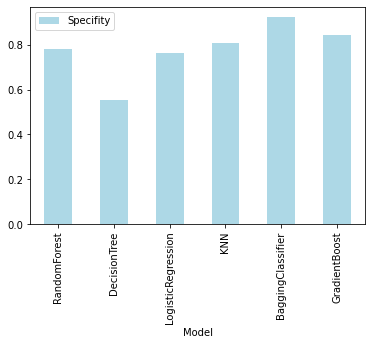

In [73]:
models1.plot(kind = 'bar',
        x = 'Model',
        y = 'Specifity',
        color = 'lightblue')


## Srovnání senzitivity modelů

In [74]:
models2 = pd.DataFrame({'Model' : ['RandomForest', 'DecisionTree', 'LogisticRegression', 'KNN', 'BaggingClassifier', 'GradientBoost'], 
                      'Senzitivity' : [sensitivity2, sensitivity3, sensitivity1, sensitivity4, sensitivity6, sensitivity5]})
models2.sort_values(by='Senzitivity', ascending=True)

,Model,Senzitivity
4,BaggingClassifier,0.492823
3,KNN,0.516746
2,LogisticRegression,0.578947
5,GradientBoost,0.612440
0,RandomForest,0.708134
1,DecisionTree,0.832536


<AxesSubplot:xlabel='Model'>

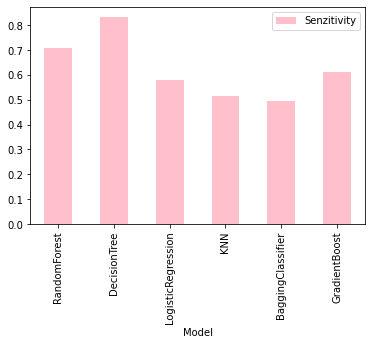

In [75]:
models2.plot(kind = 'bar',
        x = 'Model',
        y = 'Senzitivity',
        color = 'pink')